In [1]:
#This notebook is for some initial analysis on the cBioPortal clinical data
#The goal is to get an idea of how to find related attributes between different studies

#load in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Levenshtein
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams.update({'font.size':20})

In [2]:
#load the data
#focus on smallest datasets initially

directory_list = np.loadtxt("data_list.txt", dtype=str)
study_names = np.asarray([i.split('/', 2)[-1] for i in directory_list])

df_list = []
n_attributes = []
i=0
for directory in directory_list:
    #load in individual data from files and append to a list
    df = pd.read_table(directory+"/data_clinical.txt",skiprows=5)
    df['Study index'] = pd.Series([i]*df.shape[0], index=df.index)
    n_attributes.append(df.shape[1])
    df_list.append(df)
    i+=1

#combine individual dataframes into a single list
all_data = pd.concat(df_list, ignore_index=True)

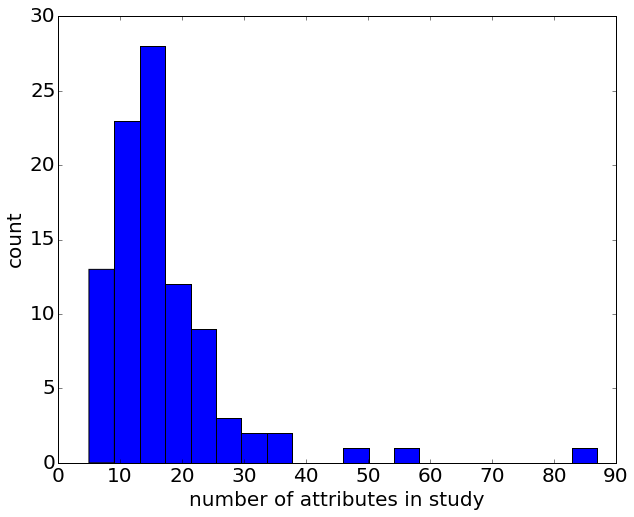

In [3]:
#Let's visualize the distribution of the number of attributes in each study
plt.hist(n_attributes, bins=20)
plt.xlabel('number of attributes in study')
plt.ylabel('count')

In [4]:
#Here is a list of all the different attributes for this data
attribute_list = list(all_data)
attribute_list

['2012_METHYLATION_CLASS',
 'ABERRANT_CELL_FRACTION',
 'ABSOLUTE_EXTRACT_PLOIDY',
 'ABSOLUTE_EXTRACT_PURITY',
 'ABSOLUTE_GENOME_DOUBLINGS',
 'ACGH_DATA',
 'ACTIONABLE_ALTERATIONS',
 'ADJUVANT_CHEMO',
 'ADJUVANT_TX',
 'ADMINISTRATION_OF_DRUG_WEEKS',
 'AGE',
 'AGENT',
 'AGE_AT_PROCUREMENT',
 'AGE_AT_SURGERY',
 'AJCC_PATHOLOGIC_TUMOR_STAGE',
 'AKT1_MUTATION',
 'ALB_(g/dL)',
 'ALP_(U/L)',
 'AML_IN_SKIN_PERCENTAGE',
 'ANATOMICAL_SUBTYPE',
 'ANATOMIC_REGION',
 'ANGIOLYMPHATIC_INVASION',
 'ARID1A_MUTATION',
 'AR_MRNA',
 'AR_PROTEIN',
 'AR_SCORE',
 'AR_V7_PRESENCE',
 'AR_V7_RATIO',
 'AR_V7_READS',
 'ASSOCIATED_GENETIC_METABOLIC_DISEASE',
 'ATM_MUT',
 'ATRX_STATUS',
 'AVE_DNA_PURITY',
 'AVE_PLOIDY',
 'AVE_RNA_PURITY',
 'Age',
 'BARRETTS_ESOPHAGUS',
 'BATCH_NUMBER',
 'BCR_STATUS',
 'BIOPSY_GLEASON_SCORE',
 'BIOPSY_GLEASON_SCORE_1',
 'BIOPSY_GLEASON_SCORE_2',
 'BLOCK_ID',
 'BMI',
 'BM_BLAST_PERCENTAGE',
 'BONE_MARROW_LEUKEMIC_BLAST_PERCENTAGE',
 'BORRMAN',
 'BRAF_KIAA1549_FUSION',
 'BRAF_MUTATION

##Now let's take a look at some attributes that seem like they might be the but named differently across other studies

In [5]:
all_data['GENDER'].value_counts()

Male      1324
Female     844
male       779
MALE       612
female     518
FEMALE     417
M           50
F           37
dtype: int64

In [6]:
all_data['SEX'].value_counts()

Male      1133
Female     925
M          138
MALE       127
F           85
male        70
female      40
FEMALE      38
dtype: int64

In [7]:
all_data['SMOKER'].value_counts()

Never Smoked          154
Heavy Smoker          118
Stopped Smoking       113
Yes                    98
No                     59
current                53
yes- former            39
Still Smoking          37
former                 33
Never Smoker           27
Y                      24
no                     20
Light Smoker           17
Smoker                 10
N                       8
yes- current            5
former (<6 months)      4
Occasional Smoker       3
former (>6 months)      3
never                   2
yes                     2
yes-                    2
former (>28 years)      1
former (>15 years)      1
yes- remote             1
occasional smoker       1
dtype: int64

In [8]:
all_data['SMOKING_HISTORY'].value_counts()

Current reformed smoker for < or = 15 years    87
Ever cigarette smoker                          61
Current reformed smoker for > 15 years         50
NO                                             31
Current smoker                                 28
YES                                            23
Former                                         21
Never cigarette smoker                         13
Current                                         7
Lifelong Non-smoker                             7
Never                                           6
dtype: int64

In [9]:
all_data['TOBACCO_SMOKING_HISTORY_INDICATOR'].value_counts()

Current reformed smoker for < or = 15 years    69
Current reformed smoker for > 15 years         67
Ever tobacco                                   65
Current smoker                                 45
Yes                                            32
Lifelong Non-smoker                            32
[Not Available]                                10
Never tobacco                                   9
No                                              8
dtype: int64

In [10]:
all_data['SMOKING_STATUS'].value_counts()

Former    58
Never     33
Active    10
active     8
dtype: int64

In [11]:
all_data['NEOADJUVANT_CHEMO'].value_counts()

0                                 97
No                                67
Yes                               42
Not performed                     11
1                                  3
Adriamycine, Endoxan, Taxotere     1
dtype: int64

In [12]:
all_data['NEOADJ_CHEMO'].value_counts()

no     94
yes     5
dtype: int64

##It would be helpful to quantify the similarity between the names of the attributes.  The Levenshtein ratio is one way to quantify the similarity between two strings

In [13]:
#What is the Levenshtein ratio for this pair?
Levenshtein.ratio('NEOADJUVANT_CHEMO', 'NEOADJ_CHEMO')

0.8275862068965517

In [14]:
#calculate the Levenshtein ratio for all pairs
total_attributes = len(attribute_list)
lev_dist = np.zeros([total_attributes, total_attributes])
for i in range(total_attributes):
    for j in range(total_attributes):
        lev_dist[i,j]=Levenshtein.ratio(attribute_list[i], attribute_list[j])

/Users/bsir/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


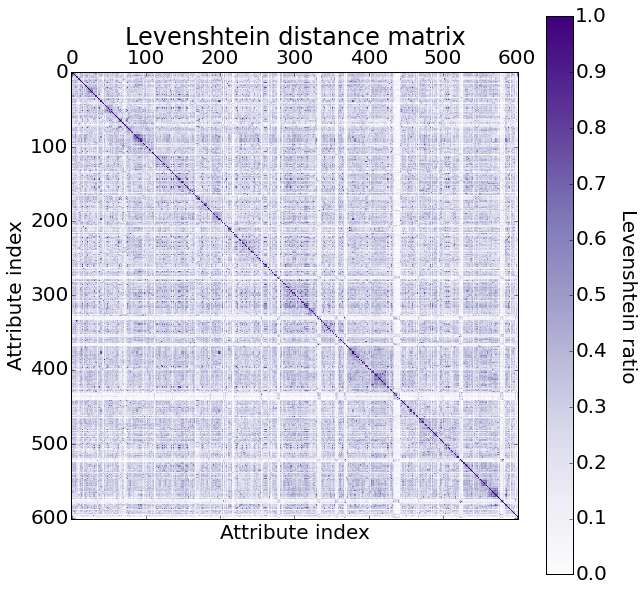

In [15]:
#Let's visualzie the Levenshtein ratio for all possible pairs
plt.rcParams['figure.figsize'] = (10, 10)
plt.matshow(lev_dist, cmap='Purples')
plt.title('Levenshtein distance matrix')
plt.ylabel('Attribute index')
plt.xlabel('Attribute index')
cbar = plt.colorbar()
cbar.set_label("Levenshtein ratio", rotation = 270, labelpad = 30)

In [16]:
#let's take a look at the variables that have a Levenshtein ratio of > 0.95
cutoff=0.90
attribute1 = np.where((lev_dist > cutoff))[0]
attribute2 = np.where((lev_dist > cutoff))[1]

#Now let's add an additional filter to make sure the attributes come from different studies
#(this filer is helpful beacuse the same study wouldn't include the same attribute with different names)
for a1, a2 in zip(attribute1,attribute2):
    if sum(all_data[attribute_list[a1]].notnull() & all_data[attribute_list[a2]].notnull()) == 0:
        print attribute_list[a1], attribute_list[a2]

ASSOCIATED_GENETIC_METABOLIC_DISEASE ASSOCIATED_GENETIC_METABOLIC_DISEASE
CDH1_STATUS IDH1_STATUS
ERG_STATUS ER_STATUS
ER_STATUS ERG_STATUS
HISTOLOGICAL_SUBTYPE HISTOLOGICAL_TYPE
HISTOLOGICAL_TYPE HISTOLOGICAL_SUBTYPE
IDH1_STATUS CDH1_STATUS
IDH1_STATUS IDH_STATUS
IDH_STATUS IDH1_STATUS
LostToFollowUp LostToFollowUp
PFS_MONTHS PF_MONTHS
PF_MONTHS PFS_MONTHS
PRIMARY_TUMOR_SITE PRIMARY_TUMOR_SIZE
PRIMARY_TUMOR_SIZE PRIMARY_TUMOR_SITE
RADIATION_TREATMENT_ADJUVANT RADIATION_TREATMENT_NEOADJUVANT
RADIATION_TREATMENT_NEOADJUVANT RADIATION_TREATMENT_ADJUVANT
RADIATION_TREATMENT_NEOADJUVANT RADIATION_TREATMENT_NEOADJUVANT
T_STAGE pT_STAGE
pT_STAGE T_STAGE


In [17]:
#let's take a look at the variables that have a Levenshtein ratio of > 0.95
cutoff=0.80
attribute1 = np.where((lev_dist > cutoff))[0]
attribute2 = np.where((lev_dist > cutoff))[1]

#Now let's add an additional filter to make sure the attributes come from different studies
#(this filer is helpful beacuse the same study wouldn't include the same attribute with different names)
for a1, a2 in zip(attribute1,attribute2):
    if sum(all_data[attribute_list[a1]].notnull() & all_data[attribute_list[a2]].notnull()) == 0:
        print attribute_list[a1], attribute_list[a2]

ARID1A_MUTATION IDH1_MUTATION
ASSOCIATED_GENETIC_METABOLIC_DISEASE ASSOCIATED_GENETIC_METABOLIC_DISEASE
ATRX_STATUS STR_STATUS
BCR_STATUS BRAF_STATUS
BCR_STATUS ER_STATUS
BCR_STATUS PR_STATUS
BIOPSY_GLEASON_SCORE_1 GLEASON_SCORE_1
BIOPSY_GLEASON_SCORE_2 GLEASON_SCORE_2
BRAF_MUTATION RHOA_MUTATION
BRAF_STATUS BCR_STATUS
BRCA1_MUTATION RHOA_MUTATION
BRCA2_MUTATION RHOA_MUTATION
CDH1_STATUS IDH1_STATUS
CDH1_STATUS IDH_STATUS
CLINICAL_STAGE CLINICAL_STATUS
CLINICAL_STATUS CLINICAL_STAGE
CNA_CLUSTER_K4 SCNA_CLUSTER
DAYS_TO_LAST_FOLLOWUP TIME_TO_LAST_FOLLOWUP
DFS_MONTHS PFS_MONTHS
DOUBLING_TIME DOUBLING_TIME_DAYS
DOUBLING_TIME_DAYS DOUBLING_TIME
EBV_STATUS ER_STATUS
EBV_STATUS ETV1_STATUS
EBV_STATUS ETV4_STATUS
EFS_STATUS ER_STATUS
EFS_STATUS METS_STATUS
EFS_STATUS PF_STATUS
ERG_STATUS ER_STATUS
ERG_STATUS HER2_STATUS
ERG_STATUS PR_STATUS
ER_STATUS BCR_STATUS
ER_STATUS EBV_STATUS
ER_STATUS EFS_STATUS
ER_STATUS ERG_STATUS
ER_STATUS STR_STATUS
ETV1_STATUS EBV_STATUS
ETV1_STATUS METS_STATUS
ETV